# UKPN Dashboard Data Report

In [84]:
# Import all required packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime, time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

import sys
sys.path.insert(0, "/home/raj/ocf/pv-solar-farm-forecasting/ukpn/scripts")

from create_plots import first_plot
from resample_data import count_total_gsp_solar
from resample_data import load_csv_to_pandas

%matplotlib inline

[Text(0, 0, 'ninefield'),
 Text(1, 0, 'sellindge'),
 Text(2, 0, 'norwich'),
 Text(3, 0, 'burwell'),
 Text(4, 0, 'braintree'),
 Text(5, 0, 'northfleet_east'),
 Text(6, 0, 'rayleigh'),
 Text(7, 0, 'richborough'),
 Text(8, 0, 'canterbury_north')]

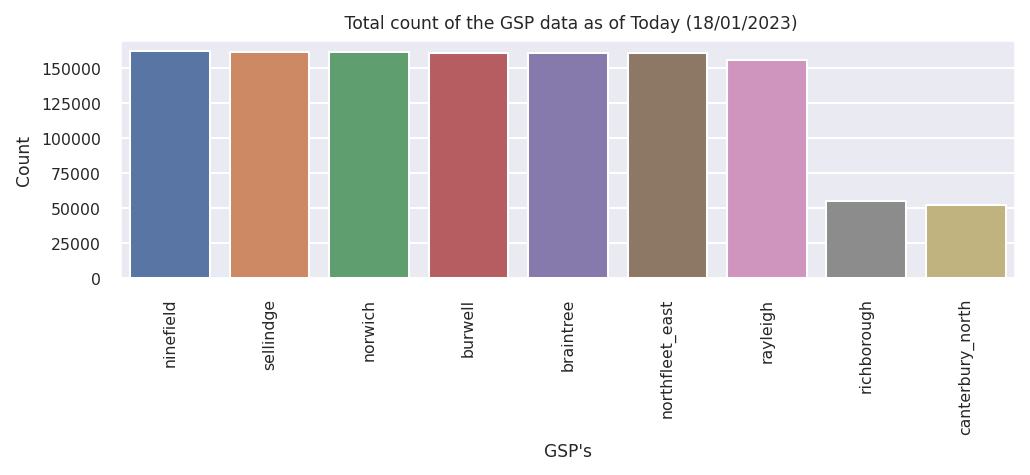

In [85]:
# Total Count - GSP Data

# Plotting a bar graph
folder_destination = "/home/raj/ocf/pv-solar-farm-forecasting/tests/data/ukpn_dashboard_data"
count_dict = count_total_gsp_solar(folder_destination = folder_destination)
bar_labels = list(count_dict.keys())
bar_values = list(count_dict.values())

# plotting using seaborn
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147},              
              font_scale=0.7)
fig, ax = plt.subplots(figsize=(7, 2))
ax.set_title(" Total count of the GSP data as of Today (18/01/2023)")
sns.barplot(x = bar_labels, y = bar_values, ax = ax)
ax.set(xlabel = "GSP's", ylabel = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

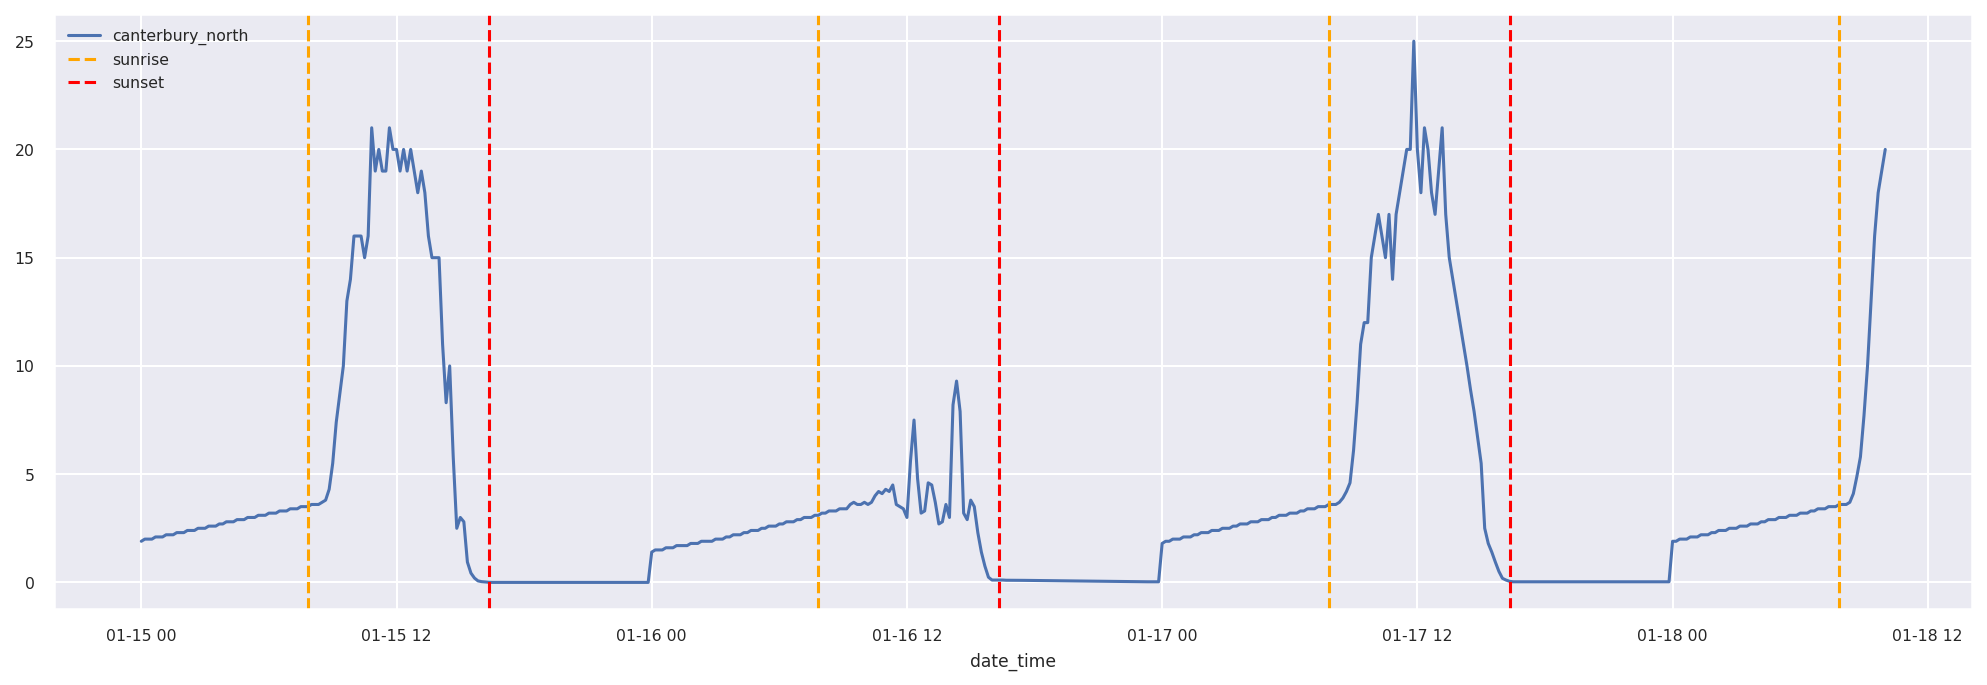

In [86]:
# Plotting Canterbury Metered power generation for the current month (18/01/2023)

# Loading the file
path_to_file = "/home/raj/ocf/pv-solar-farm-forecasting/tests/data/ukpn_dashboard_data/canterbury_north.csv"
canterbury_df = load_csv_to_pandas(path_to_file = path_to_file)

# Getting the 2023 Jan data
canterbury_df_jan = canterbury_df[canterbury_df.index.year == 2023]
canterbury_df_first = canterbury_df_jan[canterbury_df_jan.index.day.values == 15]
canterbury_df_second = canterbury_df_jan[canterbury_df_jan.index.day.values == 16]
canterbury_df_thrird = canterbury_df_jan[canterbury_df_jan.index.day.values == 17]
canterbury_df_last = canterbury_df_jan[canterbury_df_jan.index.day.values == 18]
canterbury_df_final = pd.concat([
    canterbury_df_first,
    canterbury_df_second,
    canterbury_df_thrird,
    canterbury_df_last
])
sunrise_15 = datetime(2023, 1, 15, 7, 50)
sunrise_16 = datetime(2023, 1, 16, 7, 50)
sunrise_17 = datetime(2023, 1, 17, 7, 50)
sunrise_18 = datetime(2023, 1, 18, 7, 50)

sunset_15 = datetime(2023, 1, 15, 16, 20)
sunset_16 = datetime(2023, 1, 16, 16, 20)
sunset_17 = datetime(2023, 1, 17, 16, 20)
# Create the time series plot
sns.lineplot(data = canterbury_df_final, linewidth = 1.5)
plt.axvline(sunrise_15, linewidth = 1.5, color = 'orange', linestyle = '--', label = "sunrise")
plt.axvline(sunrise_16, linewidth = 1.5, color = 'orange', linestyle = '--')
plt.axvline(sunrise_17, linewidth = 1.5, color = 'orange', linestyle = '--')
plt.axvline(sunrise_18, linewidth = 1.5, color = 'orange', linestyle = '--')

plt.axvline(sunset_15, linewidth = 1.5, color = 'red', linestyle = '--', label = "sunset")
plt.axvline(sunset_16, linewidth = 1.5, color = 'red', linestyle = '--')
plt.axvline(sunset_17, linewidth = 1.5,color = 'red', linestyle = '--')

# Naming legend
legend_labels = ["sunrise", "sunset"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = legend_labels, frameon = False)


In [ ]:
def first_plot(
    path_to_file: str
    ):
    # Getting the original data frame
    original_df = load_csv_to_pandas(path_to_file=path_to_file)

    # Getting the slopes of every two rows for the entire data frame column
    original_df["slope"] = original_df["test"].rolling(window = 2).apply(lambda x: x[1]-x[0])
    original_df["slope"] = original_df["slope"].fillna(0)

    # Getting the dates of the days with slopes range 
    active_timestamps = original_df[~original_df["slope"].between(-1.5, 1.5)]

    # Getting the most common times of the data with active power
    active_timestamps = active_timestamps.index.time
    print(np.unique(active_timestamps))
    

    # derivative = original_df[original_df.columns[0]].diff() / original_df.index.to_series().diff().dt.total_seconds()
    # original_df["trend"] = derivative.gt(0).map({False : '-1', True : '1'})
    # print(original_df.head(20))
    original_df = original_df.head(144)
    original_df.plot(y="test", use_index=True)
    plt.xlabel("Date Range")
    plt.ylabel("Gnenerated metered power (MW)")
    plt.title("Time series data of power generated")
    plt.show()
